In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import scraped NBA stats from Excel file

xls = pd.ExcelFile('nba_draft.xlsx')

map = {}
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)
    

In [3]:
new_frame = pd.DataFrame(columns=map['draft_data_2019'].columns)

# looping through each dataframe item in map, and only acquiring the rows for players who play Small Forward
for key, value in map.items():
    test = value.loc[value['position'] == 'Small']
    test.reset_index(drop=True,inplace=True)
    test.index = test.index + 1
    test.Pk = test.index
    # drop any rows that are missing data
    test = test.dropna()
    if test.empty is False:
        new_frame = new_frame.append(test)

X = new_frame.loc[:,new_frame.columns.str.startswith('college')]
y = new_frame['Pk'].astype(int)

/Users/vivianli/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [4]:
# splits the dataset into 80% train data and 20% test data
from sklearn.model_selection import train_test_split
# set random state to any integer to ensure deterministic splits between test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state= 42)

In [5]:
# scale the features so that all of them can be uniformly evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# observe accuracies for different values of k
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    train_accuracy[i] = classifier.score(X_train,y_train)
    test_accuracy[i] = classifier.score(X_test,y_test)

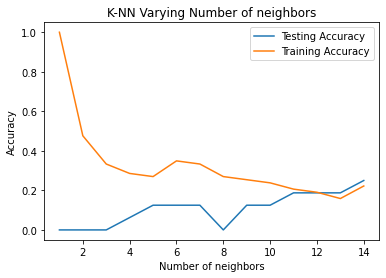

In [7]:
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors, train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('K-NN Varying Number of neighbors')
plt.show()

From this graph we can see that 11 would be the best k value 

In [8]:
# create an instance of the classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)

In [9]:
# fit the model to our training data
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [10]:
# get accuracy
classifier.score(X_test,y_test)

0.1875

In [11]:
# making predictions on the testing set
y_pred = classifier.predict(X_test)

In [12]:
# evaluate our algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0 0 0 0 0 0 1 0]
 [2 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           1       0.33      0.67      0.44         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.19        16
   macro avg       0.09      0.13      0.10        16
weighted avg       0.12      0.19      0.15        16



/Users/vivianli/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# compare final prediction values against true values
final_predictions = pd.DataFrame(columns = ['True Ranking','Predicted Ranking'])
y_test = list(y_test)
y_pred = list(y_pred)
for i in range(0,len(y_test)):
    new_row = {'True Ranking': y_test[i],'Predicted Ranking': int(y_pred[i])}
    final_predictions = final_predictions.append(new_row, ignore_index=True)
    
final_predictions

,True Ranking,Predicted Ranking
0,6,6
1,1,8
2,6,7
3,7,2
4,2,1
5,4,3
6,1,1
7,2,3
8,5,6
9,3,2
